# Podučavanje mašinskog učenja sa skupom podataka za predviđanje vremena
- Zadatak: predvideti mesec na osnovu jednodnevnih vremenskih posmatranja.
- Tehnika: Klasifikator slučajnih šuma
- Tool: Python + Scikit-learn

In [26]:
import pandas as pd
import os # za interakciju sa operativnim sistemom

In [27]:
from sklearn.model_selection import train_test_split # podela skupa podataka na trening i test skupove, što je važno za evaluaciju performansi modela
from sklearn.preprocessing import MinMaxScaler #  za skaliranje podataka od 0 do 1
from sklearn.pipeline import Pipeline # za sastavljanje više koraka obrade podataka ili modeliranja u jedan objekat, olakšava i automatizuje proces obrade podataka i izgradnje modela.

from sklearn.metrics import confusion_matrix # matrica konfuzije
from sklearn.ensemble import RandomForestClassifier 

RandomForestClassifier

Algoritam mašinskog učenja koji se koristi za klasifikaciju. 
Kombinuje više stabala odlučivanja kako bi doneo konačnu klasifikacionu odluku.

## Pipeline za korišćenje mašinskog učenja na skupu podataka za predviđanje vremena

In [28]:
# Citanje podataka
filename_data = os.path.join('dataset', 'weather_prediction_dataset.csv')

In [29]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


### Podela podataka
##### Mi biramo samo podatke za prve tri godine. Podelili smo se na obuku i testiranje, a zatim na X i y.



In [30]:
data_3years = data[:365*3].drop(columns=['DATE'])
data_train, data_test = train_test_split(data_3years, test_size=0.3, random_state=0)

In [31]:
features = data_train.columns[1:]
X = data_train[features]
y = data_train['MONTH']

## Definisanje pipeline
### u dva koraka:
- normalizujte karakteristike na opseg 0-1
– [Klasifikator slučajnih šuma](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) sa 10 stabala sa maksimalnom dubinom od 5

In [32]:
# Dajemo pipeline tuples imena koraka i objekata koraka
pipe = Pipeline([
    ('scale', MinMaxScaler()), # za skaliranje podataka od 0 do 1
    ('model', RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)) # za izgradnju modela klasifikacije. Ovaj model koristi  stabla odlučivanja kako bi klasifikovao podatke. 
    # Parametri n_estimators, max_depth i random_state za ponasanje modela. 
    # n_estimators -> za postavljanje broja stabala
    # max_depth ograničava dubinu svakog stabla radi sprečavanja prenaučenosti,# random_state postavlja početno stanje generatora slučajnih brojeva za reproduktivne rezultate.
])

In [33]:
pipe.fit(X, y) # metoda fit() se koristi za treniranje modela
               # Skaliranje će biti primenjeno na X, a zatim će model biti treniran na skaliranim podacima.

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=10,
                                        random_state=0))])

Mozemo da koristimo ovaj pipe direktono da predvidimo class label, ili plot matrice konfuzije. Prvo kreiramo plot matrice konfruzije za trening set:

In [34]:
predictions = pipe.predict(X) # za predviđanje izlaza na osnovu ulaznih podataka pipeline se primenjuje na ulazne podatke X, ukljucujuci skaliranje i modeliranje. Nakon toga, model je koriscen da predvidi izlaz za svaki uzorak u X. X su ulazni podaci koje zelimo da predvidimo 
predictions[:10] # prikazuje prvih 10 predviđenih vrednosti

array([ 6,  3, 10,  1,  4,  3,  2,  1,  6, 11], dtype=int64)

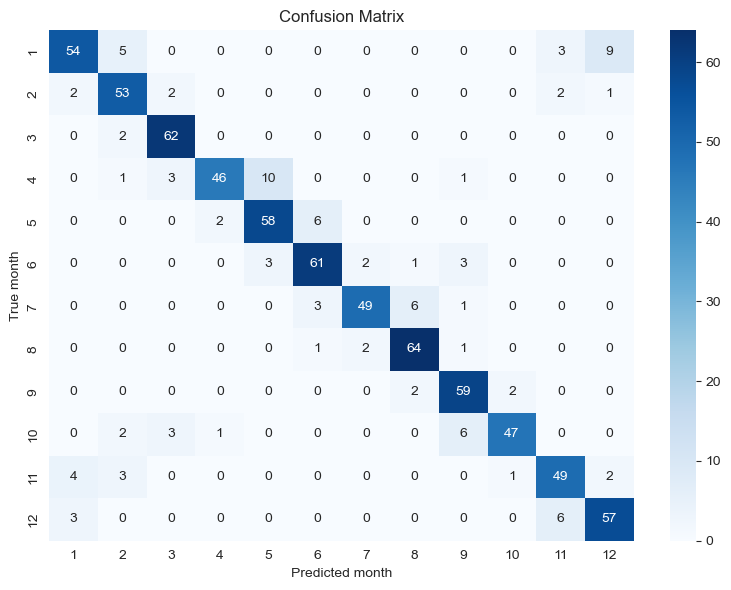

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y, predictions) # kreiranje matrice konfuzije. Kvadratna je matrica. na dijagonalama su tacne predikcije, dok su van dijagonala netacne predikcije

# Prilagodjavanje oznaka na x i y osama. Koristimo stringove za crtanje grafikona
x_labels = [str(i) for i in range(1, 13)]
y_labels = [str(i) for i in range(12, 0, -1)]

plt.figure(figsize=(8, 6)) # kreiramo novu sliku (figuru) za crtanje grafikona matrice konfuzije

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=x_labels, yticklabels=y_labels[::-1]) # vizualizacija matrice konfuzije

plt.xlabel("Predicted month")
plt.ylabel("True month")
plt.title("Confusion Matrix")

plt.tight_layout() # automatski prilagođava raspored elemenata na slici kako bi bili bolje vidljivi
plt.show() # prikaz matrice konfuzije koja omogućava vizualnu analizu performansi modela klasifikacije.

To now test in on our test set:

In [41]:
X_test = data_test[features]
y_test = data_test['MONTH']
pred_test = pipe.predict(X_test)

Crtamo matricu konfuzije za predviđanja na testnom skupu. Da bismo bili sigurni da su klase lepo poređane, jasno definišemo oznake.

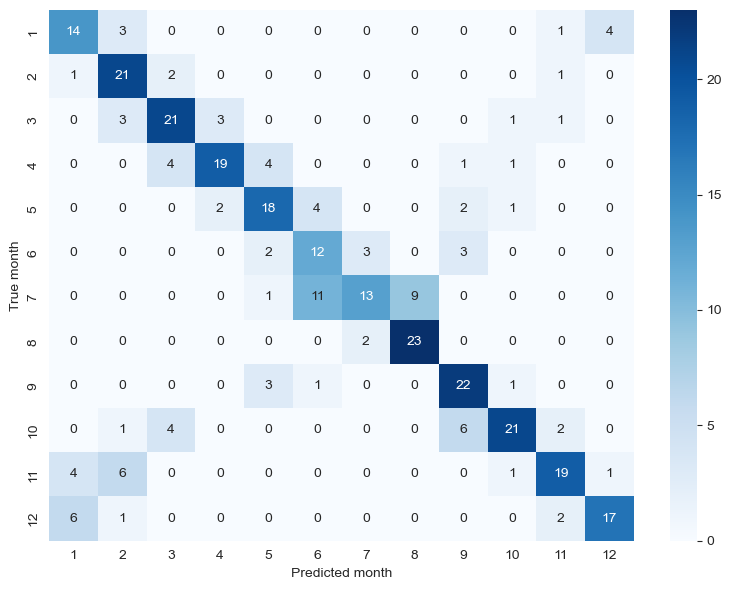

In [42]:
#  za testiranje modela na testnom skupu podataka 
import numpy as np

pred_test = pipe.predict(X_test)

conf_mat = confusion_matrix(y_test, pred_test)

# Get unique labels and sort them
labels = np.sort(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted month")
plt.ylabel("True month")
plt.tight_layout()
plt.savefig("random_forest_month_classification_testset.pdf", dpi=300)
plt.show()

marica konfuzije je gora od one na trening skupu, ovo je tesko izvuci iz matrice konfuzije. Zbog toga cemo imati jos jednu ocenu koja pokazuje koliko dobro radi nas model.

Izracunavamo tacnost: ovo je broj ispravno označenih instanci, podeljen na ukupan broj instanci. Moramo da znamo da ovaj rezultat dobro funkcionise kada imamo izbalansiran skup podataka(slican borj instanci po klasi). Ako imamo neuravnoteženu klasu, većinska klasa može da dominira rezultatom.

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
pred_test = pipe.predict(X_test)
print('Train accuracy:', accuracy_score(y, predictions))
print('Test accuracy:', accuracy_score(y_test, pred_test))

Train accuracy: 0.860313315926893
Test accuracy: 0.668693009118541


Dakle, ispostavilo se da naš model ipak ne radi tako dobro u stvarnom životu. Ovo se zove 'overfitting'. Random Forest ima različite parametre koje možete podesiti da biste model učinili robusnijim.